In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

The dataset that will be used is fashion mnist. It has 60,000 images for training and 10,000 images for testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape #the images are grayscale, therefore the pixels have only one value between 0 and 255.

(60000, 28, 28)

In [ ]:
train_labels[:11]   #just to look at the first 11 training labels, there are 10 of them, with values from 0-9, their names will be written below

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0], dtype=uint8)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show>

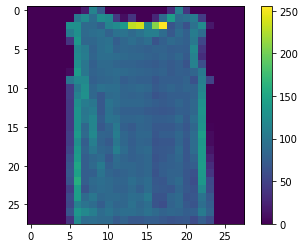

In [ ]:
#One of the images
plt.figure()
plt.imshow(train_images[700])
plt.colorbar()
plt.grid(False)
plt.show

# Data Preprocessing

It is adviceable to let all our values be between 0 and 1, since the initial weights and biases are always within that range, we divide our data by 255, which is our max value. This will make it far easier for the model to process our values.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the Model

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),  #Input layer, flatten stretches the 28 x 28 matrix arrangement of pixels to a flat 784 line of pixels
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')]) #Output layer, has 10 nodes because there are 10 possible classes
                          # softmax allows that the total of all the 10 classes values will sum up to 1(probability distribution) and no node will have any values more than 1.

# Compiling the Model


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) # This defines the parameter we want to see

# Training the Model

In [ ]:
model.fit(train_images, train_labels, epochs = 1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1759 - accuracy: 0.9343


# Evaluating the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1) 
print ('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8888
Test accuracy: 0.8888000249862671


# Making Predictions

In [ ]:
predictions = model.predict(test_images)   #if you are predicting for only 1 item it is better to put it in an array because that is what the model is used to
#i.e model.predict([test_images[12]])


Sandal


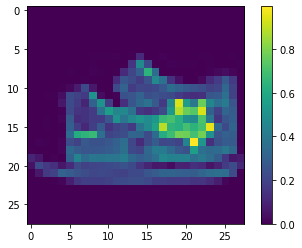

In [ ]:
print(class_names[np.argmax(predictions[9999])])  #np.argmax returns the index with the highest value, which is the predicted class
plt.figure()
plt.imshow(test_images[9999])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 8000


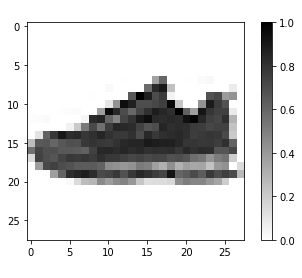

Expected: Sneaker
Guess: Sneaker


In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap = plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Expected: " + label)
  print("Guess: " + guess)


def get_number():
  while True:
    num = input('Pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num < 10000:
        return int(num)
    else:
      print('Try again...')


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
